In [1]:
import pandas as pd 

In [2]:
dataset = pd.read_csv("links.csv")

In [4]:
dataset

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [9]:
data = pd.read_csv("ratings.csv")

In [10]:
data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [15]:
unique_user_count = data['userId'].nunique()
print(f"Number of unique userId: {unique_user_count}")

Number of unique userId: 610


In [17]:
movie = pd.read_csv("movies.csv")

In [18]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:
data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [20]:
unique_user_count = data['userId'].nunique()
print(f"Number of unique userId: {unique_user_count}")

Number of unique userId: 610


In [23]:
movie_rating_counts = data.groupby('movieId').size().reset_index(name='count')
max_rated_movie_id = movie_rating_counts.loc[movie_rating_counts['count'].idxmax(), 'movieId']
max_rated_movie_title = movie[movie['movieId'] == max_rated_movie_id]['title'].values[0]

print(f"Movie with maximum number of user ratings: {max_rated_movie_title}")

Movie with maximum number of user ratings: Forrest Gump (1994)


In [24]:
tag = pd.read_csv("tags.csv")

In [25]:
matrix_id = movie[movie['title'] == "Matrix, The (1999)"]['movieId'].values[0]
matrix_tags = tag[tag['movieId'] == matrix_id]['tag'].unique()
correct_tags = ["alternate universe", "philosophy"]

print(f"Correct tags submitted by users for 'Matrix, The (1999)': {set(matrix_tags).intersection(correct_tags)}")

Correct tags submitted by users for 'Matrix, The (1999)': {'philosophy', 'alternate universe'}


In [26]:
terminator_id = movie[movie['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]
terminator_avg_rating = data[data['movieId'] == terminator_id]['rating'].mean()
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {terminator_avg_rating}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


In [33]:
grouped_ratings = data.groupby('movieId').agg(count=('rating', 'count'), mean=('rating', 'mean'))
filtered_movies = grouped_ratings[grouped_ratings['count'] > 50]
popular_movies_df = pd.merge(movie, filtered_movies, on='movieId')
most_popular_movie = popular_movies_df.loc[popular_movies_df['mean'].idxmax()]['title']
print(f"Most popular movie based on average user ratings: {most_popular_movie}")

Most popular movie based on average user ratings: Shawshank Redemption, The (1994)


In [34]:
top_5_movies = popular_movies_df.nlargest(5, 'count')['title'].tolist()
print(f"Top 5 popular movies based on number of user ratings: {top_5_movies}")

Top 5 popular movies based on number of user ratings: ['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


In [35]:
sci_fi_movies = popular_movies_df[popular_movies_df['genres'].str.contains('Sci-Fi')]
third_most_popular_sci_fi = sci_fi_movies.nlargest(3, 'count').iloc[-1]['title']
print(f"Third most popular Sci-Fi movie based on the number of user ratings: {third_most_popular_sci_fi}")

Third most popular Sci-Fi movie based on the number of user ratings: Jurassic Park (1993)


In [49]:
!pip install pandas requests beautifulsoup4

In [52]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
movie = pd.read_csv('movies.csv')
data = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
ratings_count = data.groupby('movieId').size()
movies_with_50_plus_ratings = ratings_count[ratings_count > 50].index
filtered_movies_df = movie[movie['movieId'].isin(movies_with_50_plus_ratings)]
filtered_movies_with_links = pd.merge(filtered_movies_df, links, on='movieId')
print("Filtered Movies with more than 50 ratings:")
print(filtered_movies_with_links.head())
def get_imdb_reviews(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/reviews'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    reviews = soup.find_all('div', class_='text show-more__control')
    return [review.get_text() for review in reviews]
if not filtered_movies_with_links.empty:
    first_movie_imdb_id = filtered_movies_with_links.iloc[0]['imdbId']
    print(f"\nScraping reviews for IMDb ID: {first_movie_imdb_id}")
    reviews = get_imdb_reviews(first_movie_imdb_id)
    print("\nFirst 5 reviews:")
    for i, review in enumerate(reviews[:5], 1):
        print(f"Review {i}: {review}\n")
else:
    print("No movies found with more than 50 ratings.")

Filtered Movies with more than 50 ratings:
   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
3        6              Heat (1995)   
4        7           Sabrina (1995)   

                                        genres  imdbId   tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709    862.0  
1                   Adventure|Children|Fantasy  113497   8844.0  
2                               Comedy|Romance  113228  15602.0  
3                        Action|Crime|Thriller  113277    949.0  
4                               Comedy|Romance  114319  11860.0  

Scraping reviews for IMDb ID: 114709

First 5 reviews:


In [55]:
import pandas as pd
movie= pd.read_csv('movies.csv')
data = pd.read_csv('ratings.csv')
dataset= pd.read_csv('links.csv')
sci_fi_movies = movie[movie['genres'].str.contains('Sci-Fi', case=False, na=False)]
merged_data = pd.merge(sci_fi_movies, data, on='movieId')
average_ratings = merged_data.groupby('movieId').agg({'rating': 'mean'}).reset_index()
highest_rated_movie = average_ratings.loc[average_ratings['rating'].idxmax()]
highest_rated_movie_id = highest_rated_movie['movieId']
print(f"The movieId of the highest-rated Sci-Fi movie is: {highest_rated_movie_id}")

The movieId of the highest-rated Sci-Fi movie is: 3687.0


In [44]:

!pip install seaborn

count    218.000000
mean       4.272936
std        0.861384
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


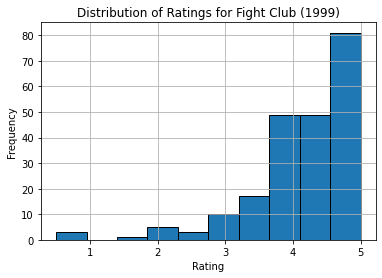

In [48]:
!pip install matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
movie = pd.read_csv('movies.csv')
data = pd.read_csv('ratings.csv')
fight_club_movie_id = movie[movie['title'] == "Fight Club (1999)"]['movieId'].values[0]
fight_club_ratings = data[data['movieId'] == fight_club_movie_id]['rating']# Display basic statistics
print(fight_club_ratings.describe())
fight_club_ratings.hist(bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()